# 六章　学習に関するテクニック

今章では前回までに習ったニューラルネットワークの学習をより効率的に無駄なく扱えるような様々なテクニックを学びます。

## パラメータの最適化

以前実装した確率的勾配降下法(略して**SGD**)は単純で非常に分かりやすいものでしたが、以下のような複雑な関数では非常に無駄が多くなってしまいます。

$$
   f(x,y)=\frac{1}{20}x^2+y^2
$$

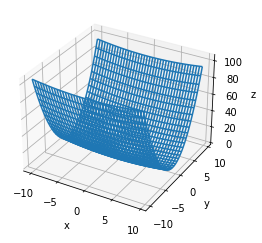

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def function_1(x,y):
    return 1/20*x**2+y**2

x1=np.arange(-10,10,0.5)
y1=np.arange(-10,10,0.5)
X,Y=np.meshgrid(x1,y1)
Z=function_1(X,Y)
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.plot_wireframe(X, Y, Z)
plt.show()

NameError: name 'function_b' is not defined

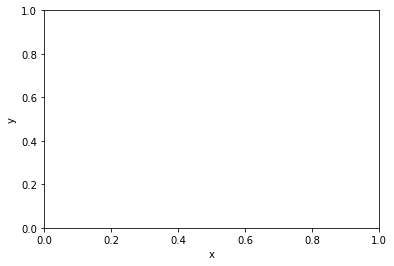

In [2]:
def function_2(x,y):
    return 1/10*x,2*y

x=np.arange(-10,10,0.5)
y=np.arange(-4.5,4.5,0.5)
plt.xlabel("x")
plt.ylabel("y")
xx,yy=np.meshgrid(x, y)

function_b_matrix=function_b(xx,yy)
function_c_matrix=function_c(xx,yy)

plt.quiver(xx,yy,-function_b_matrix,-function_c_matrix)
plt.show()

勾配のグラフから、この関数は最小値が$ (x,y)=(0,0) $であるのに勾配の多くはその座標の方向を指していないことが分かります。無駄が多くなってしまうのも納得です。

In [3]:
class SGD: #SGDの定義

    """確率的勾配降下法（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 

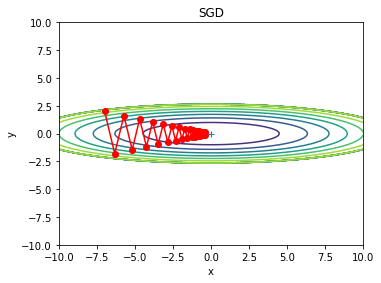

In [4]:
from collections import OrderedDict

init_pos = (-7.0, 2.0) #初期値
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = function_2(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = function_1(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot
    plt.figure(figsize=(12,9))
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

このようにSGDによる最適解の更新経路はジグザグであり非常に無駄が多いです。そこでSGDに代わる手法としてほかに三つの手法を提示、実装します。

### Momentum

**Momentum**は次のような数式で表される手法です。簡単に説明すると、時間が経過するごとに徐々に減速することで無駄なく最小値を求めるという手法です。

$$
    v←\alpha v-\eta\frac{\partial L}{\partial W} \\
    W←W+v
$$

$ W $は更新する重みパラメータ、$ \eta $は学習係数、$ \alpha $はハイパーパラメータを示します。

In [5]:
class Momentum: #Momentumの定義

    """Momentum SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

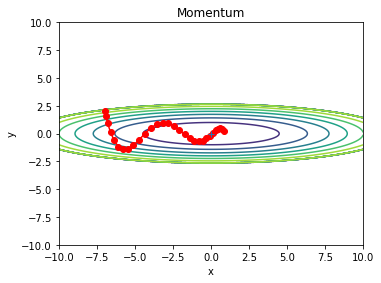

In [6]:
from collections import OrderedDict

init_pos = (-7.0, 2.0) #初期値
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

optimizers = OrderedDict()
optimizers["Momentum"] = Momentum(lr=0.1)
idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = function_2(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = function_1(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot
    plt.figure(figsize=(12,9))
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

SGDの時と比べてジグザグの動きを軽減することができました。

### AdaGrad

**AdaGrad**はMomentumの欠点をなくした手法です。Momentumは時間によって速度が変わるため、初期値によっては無駄が多くなってしまいます。そこでAdaGradでは移動距離に応じて速度が変わります。今まで進んだ分も蓄積しているため、Momentumのように止まることはありません。

$$
    h←h+\frac{\partial L}{\partial W}⦿\frac{\partial L}{\partial W} \\
    W=W-\eta\frac{1}{\sqrt{h}}\frac{\partial L}{\partial W}
$$

⦿は行列ごとの掛け算を意味します。

In [7]:
class AdaGrad: #AdaGradの定義

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

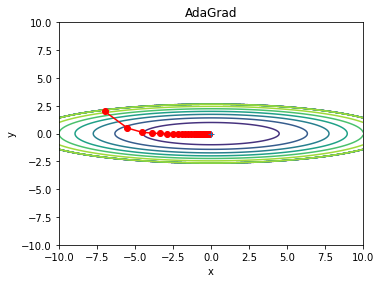

In [8]:
from collections import OrderedDict

init_pos = (-7.0, 2.0) #初期値
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

optimizers = OrderedDict()
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = function_2(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = function_1(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot
    plt.figure(figsize=(12,9))
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

ジグザグがなくなって非常に効率的ですね。

### Adam

**Adam**は先ほどのMomentumとAdaGradを融合したような手法です。理論は複雑ですが、その分効率的と考えられています。

In [9]:
class Adam: #Adamの定義

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

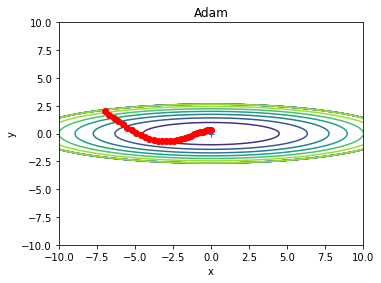

In [10]:
from collections import OrderedDict

init_pos = (-7.0, 2.0) #初期値
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

optimizers = OrderedDict()
optimizers["Adam"] = Adam(lr=0.3)
idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = function_2(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = function_1(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot
    plt.figure(figsize=(12,9))
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

それでは最後にMNISTデータセットを用いて４つの手法の学習の進み具合を比較していきましょう。

===========iteration:0===========
SGD:2.4458379446883396
Momentum:2.3238317489960076
AdaGrad:2.449641179599669
Adam:2.2729409297220076
===========iteration:100===========
SGD:1.7000332868693304
Momentum:0.29704666150010983
AdaGrad:0.11570246684182009
Adam:0.27709970048658994
===========iteration:200===========
SGD:0.8383126550017275
Momentum:0.1598801820097135
AdaGrad:0.06583815810277664
Adam:0.08407292129798956
===========iteration:300===========
SGD:0.5072150185730158
Momentum:0.17240425708824425
AdaGrad:0.1057557544583043
Adam:0.1559815725084701
===========iteration:400===========
SGD:0.3682722671357071
Momentum:0.13645802383185862
AdaGrad:0.03903407592507367
Adam:0.06423675404958626
===========iteration:500===========
SGD:0.3608895873538853
Momentum:0.17255214834579433
AdaGrad:0.0944565186877885
Adam:0.12092062243204835
===========iteration:600===========
SGD:0.5131242011401873
Momentum:0.20389776095490222
AdaGrad:0.11663192495417872
Adam:0.16838930145436953
===========iteration:70

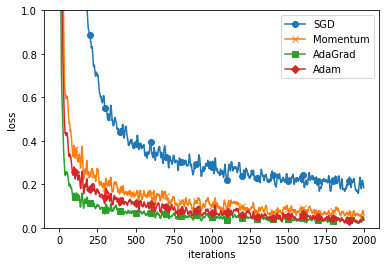

In [11]:
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

このグラフではAdaGradが最も早く学習できていることを示していますが、こういった値はハイパーパラメータやニューラルネットワークの構造によっても変わってくるため、２次方程式の解法のように時と場合に応じて使い分けておきましょう。

## 重みの初期値設定

ニューラルネットワークの学習ではハイパーパラメータとして重みの初期値が存在します。この値は0に近づけることで過学習を防ぎ汎化性能を高めることができます。しかし、重みの初期値を0にすると誤差逆伝播法においてすべての重みの値が同じように伝わってしまいます。そうならないためにも最適な値を見つけられるように、様々な手法を実装していきましょう。

以下のヒストグラムは五層の隠れ層があるニューラルネットワークの一層ごとの出力データを示したものです。

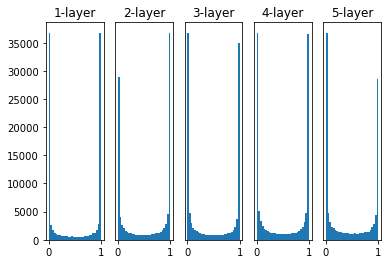

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

シグモイド関数はステップ関数と非常に似た形で、その微分した値はほとんどが0と1です。そのため、このようにデータが0と1に偏ると勾配は消えてしまいます(**勾配消失**)。

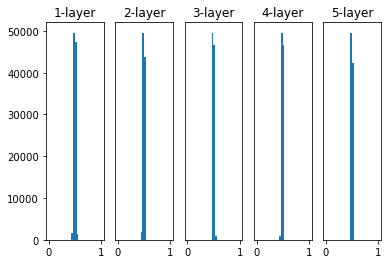

In [13]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

このように初期値の値を変えれば勾配消失は起こらなくなりますが、それでも出力データには大きな偏りが存在します。これではいけません。そこで、論文で紹介されていた二つの初期値を実装していきたいと思います。

### Xavier

これはノードの数をを$ n $としたときに重みの初期値を$ \frac{1}{\sqrt n} $とするものです。実装すると以下のようになります。

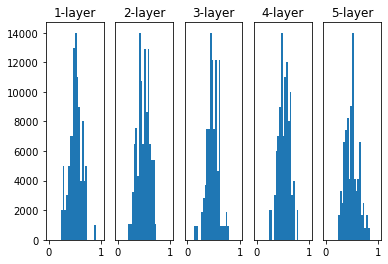

In [14]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0/node_num)
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

これを見るとデータがしっかり分布していることが分かります。

### Kaiming He

シグモイド関数なら先ほどの初期値で大丈夫でしょうが、ReLU関数ならどうでしょうか。非線形でないことから今までの初期値は使えません。そこでReLU関数に特化した初期値を用います。それがHeの初期値です。これは初期値を$ \sqrt{\frac{2}{n}} $とするものです。

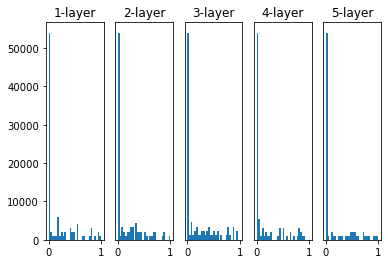

In [15]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0/node_num)
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = ReLU(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

それでは最後に今回もMNISTデータセットで比較していきましょう。

===========iteration:0===========
std=0.01:2.3025092832162066
Xavier:2.315777201867945
He:2.4123758257152024
===========iteration:100===========
std=0.01:2.301865292930425
Xavier:2.2427642587663352
He:1.5196007269648213
===========iteration:200===========
std=0.01:2.3022636956752223
Xavier:2.09622452709043
He:0.8742656082932119
===========iteration:300===========
std=0.01:2.300041476373565
Xavier:1.805807936308171
He:0.44589442642607713
===========iteration:400===========
std=0.01:2.30266479173848
Xavier:1.3033997417354948
He:0.32314622321014036
===========iteration:500===========
std=0.01:2.298166400963867
Xavier:0.9012129829042295
He:0.4147739299367662
===========iteration:600===========
std=0.01:2.3008290717402087
Xavier:0.6384058849773707
He:0.31461958811733104
===========iteration:700===========
std=0.01:2.302080751378776
Xavier:0.45459199999584543
He:0.2790201373109271
===========iteration:800===========
std=0.01:2.2999661385141565
Xavier:0.5868815881701003
He:0.315315185144851
=

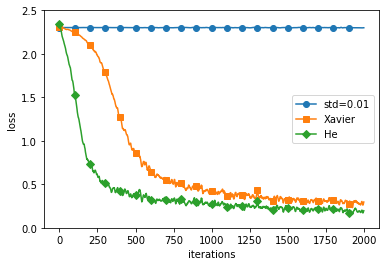

In [16]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

## Batch Normalization

今まで行ってきたハイパーパラメータの適切な値は結局のところ人力の値でした。そのような手間を減らすためにも、ここでは強制的に重みの初期値というハイパーパラメータを算出できる**Batch Normalization**(以降、Batch Norm)という手法を実装していきます。

Batch Normはその名の通りミニバッチごとに分布を平均なら0、分散なら1といったように正規化するものです。以下に手順を示します。これにより学習を効率的にしつつ初期値を考えなくてもいいようになり、さらには過学習も防ぐこともできます。

$$
    \eta_B=\frac{1}{m}\sum_{i=1}^{m}x_i \\
    \sigma^2_B=\frac{1}{m}\sum_{i=1}^{m}(x_i-\eta_B)^2 \\
$$

ミニバッチとして$ B={x_1,x_2,…x_m} $という$ m $個の入力データから平均($ \eta_B $)と分散($ \sigma^2_B $)を求めています。

$$
   x_{i1}=\frac{x_i-\eta_B}{\sqrt{\sigma^2_B+\epsilon}} \\
   y_i=\gamma x_{i1}+\beta
$$

そしてそのデータを平均0、分散1のデータ$ {x_{11},x_{21},…x_{m1}} $に変換してから固有のパラメータ$ \gamma $、$ \beta $で$ {y_1,y_2,…y_m} $に変換します。最初は$ \gamma=1 $、$ \beta=0 $から始まり、適切な値に調整されていきます。

それでは実際にBatch Normレイヤの効果を見てみましょう。扱うデータは相も変わらずMNISTデータセットです。

============== 1/16 ==============
epoch:0 | 0.097 - 0.094
epoch:1 | 0.099 - 0.115
epoch:2 | 0.099 - 0.157
epoch:3 | 0.099 - 0.192
epoch:4 | 0.099 - 0.221
epoch:5 | 0.099 - 0.249
epoch:6 | 0.117 - 0.26
epoch:7 | 0.117 - 0.284
epoch:8 | 0.117 - 0.291
epoch:9 | 0.117 - 0.32
epoch:10 | 0.117 - 0.324
epoch:11 | 0.117 - 0.36
epoch:12 | 0.117 - 0.369
epoch:13 | 0.117 - 0.391
epoch:14 | 0.117 - 0.397
epoch:15 | 0.117 - 0.407
epoch:16 | 0.117 - 0.426
epoch:17 | 0.117 - 0.445
epoch:18 | 0.117 - 0.446


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.46
============== 2/16 ==============
epoch:0 | 0.097 - 0.111


C:\Users\YunaTAOKA\anaconda3\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\YunaTAOKA\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\YunaTAOKA\anaconda3\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.098
epoch:2 | 0.097 - 0.108
epoch:3 | 0.097 - 0.121
epoch:4 | 0.097 - 0.137
epoch:5 | 0.097 - 0.16
epoch:6 | 0.097 - 0.177
epoch:7 | 0.097 - 0.202
epoch:8 | 0.097 - 0.237
epoch:9 | 0.097 - 0.266
epoch:10 | 0.097 - 0.286
epoch:11 | 0.097 - 0.308
epoch:12 | 0.097 - 0.339
epoch:13 | 0.097 - 0.362
epoch:14 | 0.097 - 0.384
epoch:15 | 0.097 - 0.397
epoch:16 | 0.097 - 0.422
epoch:17 | 0.097 - 0.419
epoch:18 | 0.097 - 0.439


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.463
============== 3/16 ==============
epoch:0 | 0.115 - 0.108
epoch:1 | 0.361 - 0.118
epoch:2 | 0.501 - 0.183
epoch:3 | 0.596 - 0.235
epoch:4 | 0.65 - 0.273
epoch:5 | 0.716 - 0.297
epoch:6 | 0.785 - 0.323
epoch:7 | 0.804 - 0.349
epoch:8 | 0.849 - 0.379
epoch:9 | 0.877 - 0.414
epoch:10 | 0.904 - 0.46
epoch:11 | 0.925 - 0.474
epoch:12 | 0.941 - 0.508
epoch:13 | 0.953 - 0.532
epoch:14 | 0.967 - 0.55
epoch:15 | 0.979 - 0.571
epoch:16 | 0.982 - 0.596
epoch:17 | 0.985 - 0.604
epoch:18 | 0.985 - 0.621


No handles with labels found to put in legend.


epoch:19 | 0.989 - 0.633
============== 4/16 ==============
epoch:0 | 0.144 - 0.103
epoch:1 | 0.328 - 0.109
epoch:2 | 0.411 - 0.162
epoch:3 | 0.518 - 0.254
epoch:4 | 0.559 - 0.328
epoch:5 | 0.64 - 0.381
epoch:6 | 0.655 - 0.428
epoch:7 | 0.689 - 0.471
epoch:8 | 0.71 - 0.514
epoch:9 | 0.752 - 0.552
epoch:10 | 0.766 - 0.579
epoch:11 | 0.766 - 0.597
epoch:12 | 0.781 - 0.632
epoch:13 | 0.803 - 0.665
epoch:14 | 0.809 - 0.681
epoch:15 | 0.818 - 0.698
epoch:16 | 0.831 - 0.718
epoch:17 | 0.843 - 0.736
epoch:18 | 0.853 - 0.75


No handles with labels found to put in legend.


epoch:19 | 0.856 - 0.764
============== 5/16 ==============
epoch:0 | 0.086 - 0.144
epoch:1 | 0.085 - 0.162
epoch:2 | 0.089 - 0.273
epoch:3 | 0.099 - 0.404
epoch:4 | 0.105 - 0.498
epoch:5 | 0.108 - 0.582
epoch:6 | 0.11 - 0.644
epoch:7 | 0.114 - 0.677
epoch:8 | 0.123 - 0.709
epoch:9 | 0.123 - 0.741
epoch:10 | 0.129 - 0.763
epoch:11 | 0.134 - 0.791
epoch:12 | 0.14 - 0.805
epoch:13 | 0.149 - 0.819
epoch:14 | 0.161 - 0.836
epoch:15 | 0.163 - 0.847
epoch:16 | 0.178 - 0.859
epoch:17 | 0.204 - 0.877
epoch:18 | 0.215 - 0.887


No handles with labels found to put in legend.


epoch:19 | 0.248 - 0.902
============== 6/16 ==============
epoch:0 | 0.142 - 0.096
epoch:1 | 0.133 - 0.2
epoch:2 | 0.13 - 0.421
epoch:3 | 0.122 - 0.604
epoch:4 | 0.157 - 0.686
epoch:5 | 0.124 - 0.726
epoch:6 | 0.117 - 0.76
epoch:7 | 0.117 - 0.792
epoch:8 | 0.117 - 0.818
epoch:9 | 0.117 - 0.84
epoch:10 | 0.117 - 0.85
epoch:11 | 0.117 - 0.866
epoch:12 | 0.175 - 0.877
epoch:13 | 0.171 - 0.893
epoch:14 | 0.157 - 0.908
epoch:15 | 0.161 - 0.916
epoch:16 | 0.137 - 0.924
epoch:17 | 0.138 - 0.933
epoch:18 | 0.117 - 0.937

No handles with labels found to put in legend.



epoch:19 | 0.117 - 0.945
============== 7/16 ==============
epoch:0 | 0.097 - 0.071
epoch:1 | 0.116 - 0.309
epoch:2 | 0.116 - 0.608
epoch:3 | 0.109 - 0.686
epoch:4 | 0.116 - 0.748
epoch:5 | 0.116 - 0.788
epoch:6 | 0.117 - 0.816
epoch:7 | 0.116 - 0.843
epoch:8 | 0.116 - 0.864
epoch:9 | 0.116 - 0.877
epoch:10 | 0.117 - 0.907
epoch:11 | 0.117 - 0.917
epoch:12 | 0.116 - 0.941
epoch:13 | 0.116 - 0.956
epoch:14 | 0.116 - 0.964
epoch:15 | 0.116 - 0.974
epoch:16 | 0.116 - 0.976
epoch:17 | 0.116 - 0.979
epoch:18 | 0.116 - 0.986


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.986
============== 8/16 ==============
epoch:0 | 0.117 - 0.116
epoch:1 | 0.117 - 0.478
epoch:2 | 0.117 - 0.714
epoch:3 | 0.116 - 0.768
epoch:4 | 0.117 - 0.82
epoch:5 | 0.117 - 0.839
epoch:6 | 0.117 - 0.887
epoch:7 | 0.117 - 0.926
epoch:8 | 0.117 - 0.948
epoch:9 | 0.117 - 0.97
epoch:10 | 0.117 - 0.976
epoch:11 | 0.117 - 0.984
epoch:12 | 0.117 - 0.988
epoch:13 | 0.116 - 0.992
epoch:14 | 0.117 - 0.996
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 0.999
epoch:19 | 0.116 - 0.998


No handles with labels found to put in legend.


============== 9/16 ==============
epoch:0 | 0.117 - 0.118
epoch:1 | 0.116 - 0.518
epoch:2 | 0.117 - 0.735
epoch:3 | 0.117 - 0.831
epoch:4 | 0.117 - 0.899
epoch:5 | 0.117 - 0.943
epoch:6 | 0.117 - 0.961
epoch:7 | 0.117 - 0.983
epoch:8 | 0.117 - 0.987
epoch:9 | 0.117 - 0.992
epoch:10 | 0.117 - 0.995
epoch:11 | 0.117 - 0.997
epoch:12 | 0.117 - 0.999
epoch:13 | 0.117 - 0.996
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.099 - 0.103
epoch:1 | 0.117 - 0.497
epoch:2 | 0.117 - 0.725
epoch:3 | 0.117 - 0.826
epoch:4 | 0.117 - 0.839
epoch:5 | 0.117 - 0.84
epoch:6 | 0.117 - 0.934
epoch:7 | 0.117 - 0.882
epoch:8 | 0.117 - 0.972
epoch:9 | 0.117 - 0.979
epoch:10 | 0.117 - 0.983
epoch:11 | 0.117 - 0.98
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.995
epoch:14 | 0.117 - 0.995
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.997


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.997
============== 11/16 ==============
epoch:0 | 0.092 - 0.108
epoch:1 | 0.117 - 0.634
epoch:2 | 0.116 - 0.694
epoch:3 | 0.117 - 0.795
epoch:4 | 0.117 - 0.849
epoch:5 | 0.117 - 0.853
epoch:6 | 0.117 - 0.81
epoch:7 | 0.117 - 0.887
epoch:8 | 0.117 - 0.978
epoch:9 | 0.117 - 0.98
epoch:10 | 0.117 - 0.985
epoch:11 | 0.117 - 0.964
epoch:12 | 0.117 - 0.984
epoch:13 | 0.117 - 0.984
epoch:14 | 0.117 - 0.993
epoch:15 | 0.117 - 0.991
epoch:16 | 0.117 - 0.993
epoch:17 | 0.117 - 0.994
epoch:18 | 0.117 - 0.995


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.995
============== 12/16 ==============
epoch:0 | 0.099 - 0.145
epoch:1 | 0.117 - 0.269
epoch:2 | 0.116 - 0.577
epoch:3 | 0.117 - 0.587
epoch:4 | 0.116 - 0.674
epoch:5 | 0.117 - 0.676
epoch:6 | 0.116 - 0.75
epoch:7 | 0.116 - 0.753
epoch:8 | 0.116 - 0.779
epoch:9 | 0.116 - 0.774
epoch:10 | 0.116 - 0.789
epoch:11 | 0.116 - 0.786
epoch:12 | 0.117 - 0.783
epoch:13 | 0.117 - 0.803
epoch:14 | 0.117 - 0.797
epoch:15 | 0.117 - 0.804
epoch:16 | 0.117 - 0.807
epoch:17 | 0.117 - 0.806
epoch:18 | 0.117 - 0.805


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.807
============== 13/16 ==============
epoch:0 | 0.092 - 0.178
epoch:1 | 0.116 - 0.55
epoch:2 | 0.117 - 0.515
epoch:3 | 0.117 - 0.599
epoch:4 | 0.116 - 0.59
epoch:5 | 0.116 - 0.666
epoch:6 | 0.116 - 0.639
epoch:7 | 0.116 - 0.645
epoch:8 | 0.116 - 0.653
epoch:9 | 0.116 - 0.668
epoch:10 | 0.116 - 0.654
epoch:11 | 0.116 - 0.672
epoch:12 | 0.116 - 0.651
epoch:13 | 0.116 - 0.718
epoch:14 | 0.116 - 0.716
epoch:15 | 0.116 - 0.712
epoch:16 | 0.116 - 0.708
epoch:17 | 0.116 - 0.646


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.705
epoch:19 | 0.116 - 0.709
============== 14/16 ==============
epoch:0 | 0.094 - 0.157
epoch:1 | 0.105 - 0.369
epoch:2 | 0.105 - 0.348
epoch:3 | 0.105 - 0.399
epoch:4 | 0.116 - 0.402
epoch:5 | 0.116 - 0.449
epoch:6 | 0.116 - 0.47
epoch:7 | 0.116 - 0.493
epoch:8 | 0.116 - 0.48
epoch:9 | 0.116 - 0.496
epoch:10 | 0.116 - 0.478
epoch:11 | 0.116 - 0.501
epoch:12 | 0.116 - 0.472
epoch:13 | 0.116 - 0.459
epoch:14 | 0.116 - 0.494
epoch:15 | 0.116 - 0.495
epoch:16 | 0.116 - 0.504
epoch:17 | 0.116 - 0.505
epoch:18 | 0.116 - 0.508
epoch:19 | 0.116 - 0.528


No handles with labels found to put in legend.


============== 15/16 ==============
epoch:0 | 0.097 - 0.138
epoch:1 | 0.117 - 0.334
epoch:2 | 0.117 - 0.464
epoch:3 | 0.117 - 0.498
epoch:4 | 0.117 - 0.493
epoch:5 | 0.117 - 0.505
epoch:6 | 0.117 - 0.524
epoch:7 | 0.117 - 0.524
epoch:8 | 0.117 - 0.522
epoch:9 | 0.117 - 0.522
epoch:10 | 0.117 - 0.607
epoch:11 | 0.117 - 0.603
epoch:12 | 0.117 - 0.614
epoch:13 | 0.117 - 0.616
epoch:14 | 0.117 - 0.603
epoch:15 | 0.117 - 0.586
epoch:16 | 0.117 - 0.704
epoch:17 | 0.117 - 0.708
epoch:18 | 0.117 - 0.711


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.714
============== 16/16 ==============
epoch:0 | 0.097 - 0.097
epoch:1 | 0.105 - 0.3
epoch:2 | 0.117 - 0.337
epoch:3 | 0.117 - 0.473
epoch:4 | 0.116 - 0.48
epoch:5 | 0.116 - 0.482
epoch:6 | 0.116 - 0.489
epoch:7 | 0.116 - 0.517
epoch:8 | 0.116 - 0.509
epoch:9 | 0.116 - 0.517
epoch:10 | 0.116 - 0.515
epoch:11 | 0.116 - 0.514
epoch:12 | 0.116 - 0.518
epoch:13 | 0.116 - 0.51
epoch:14 | 0.116 - 0.522
epoch:15 | 0.116 - 0.514
epoch:16 | 0.116 - 0.32
epoch:17 | 0.116 - 0.4
epoch:18 | 0.116 - 0.412
epoch:19 | 0.116 - 0.412


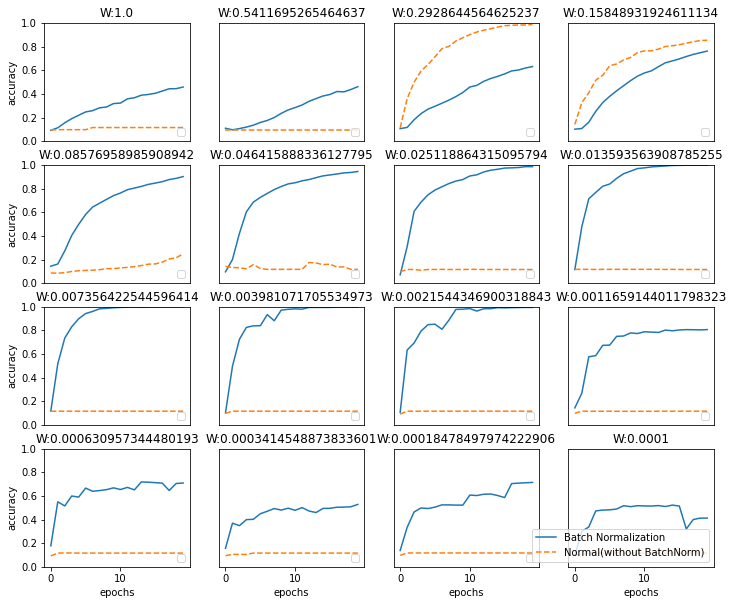

In [17]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)
plt.rcParams['figure.figsize'] = (12,10)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

## 過学習の回避

過学習の説明は以前したので繰り返しません。わざと発生させて実装してみたいと思います。

epoch:0, train acc:0.13666666666666666, test acc:0.118
epoch:1, train acc:0.15, test acc:0.1323
epoch:2, train acc:0.19333333333333333, test acc:0.1478
epoch:3, train acc:0.22333333333333333, test acc:0.1643
epoch:4, train acc:0.24333333333333335, test acc:0.1802
epoch:5, train acc:0.27666666666666667, test acc:0.2091
epoch:6, train acc:0.31, test acc:0.2208
epoch:7, train acc:0.3566666666666667, test acc:0.2431
epoch:8, train acc:0.37333333333333335, test acc:0.2619
epoch:9, train acc:0.4, test acc:0.2817
epoch:10, train acc:0.44, test acc:0.313
epoch:11, train acc:0.4266666666666667, test acc:0.3185
epoch:12, train acc:0.47333333333333333, test acc:0.3366
epoch:13, train acc:0.5033333333333333, test acc:0.3479
epoch:14, train acc:0.5033333333333333, test acc:0.3624
epoch:15, train acc:0.54, test acc:0.3871
epoch:16, train acc:0.5666666666666667, test acc:0.3992
epoch:17, train acc:0.58, test acc:0.4153
epoch:18, train acc:0.6133333333333333, test acc:0.4407
epoch:19, train acc:0.6433

epoch:162, train acc:1.0, test acc:0.7363
epoch:163, train acc:1.0, test acc:0.7361
epoch:164, train acc:1.0, test acc:0.7348
epoch:165, train acc:1.0, test acc:0.7372
epoch:166, train acc:1.0, test acc:0.7347
epoch:167, train acc:1.0, test acc:0.7346
epoch:168, train acc:1.0, test acc:0.7362
epoch:169, train acc:1.0, test acc:0.7344
epoch:170, train acc:1.0, test acc:0.7376
epoch:171, train acc:1.0, test acc:0.7374
epoch:172, train acc:1.0, test acc:0.7363
epoch:173, train acc:1.0, test acc:0.7344
epoch:174, train acc:1.0, test acc:0.7353
epoch:175, train acc:1.0, test acc:0.7365
epoch:176, train acc:1.0, test acc:0.7371
epoch:177, train acc:1.0, test acc:0.7376
epoch:178, train acc:1.0, test acc:0.737
epoch:179, train acc:1.0, test acc:0.7374
epoch:180, train acc:1.0, test acc:0.7362
epoch:181, train acc:1.0, test acc:0.7386
epoch:182, train acc:1.0, test acc:0.7384
epoch:183, train acc:1.0, test acc:0.737
epoch:184, train acc:1.0, test acc:0.7383
epoch:185, train acc:1.0, test acc:0

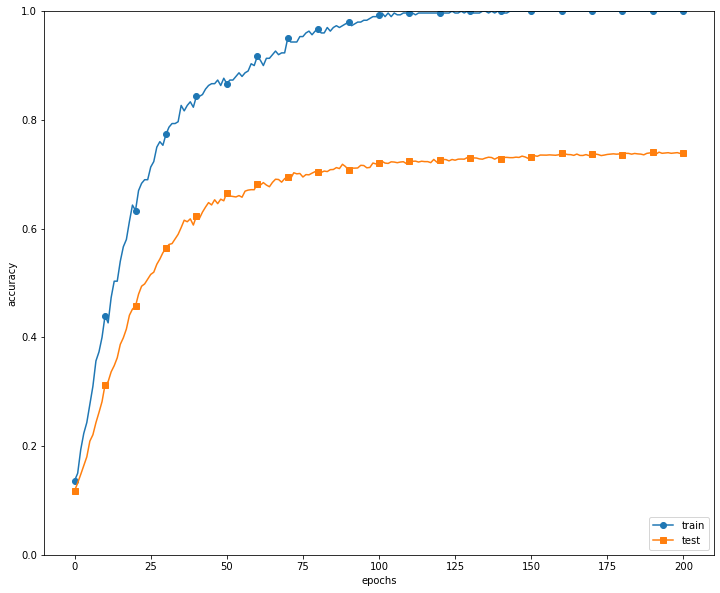

In [18]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### Weight decay

過学習抑制の方法として昔から知られているのが、**Weight decay**(**荷重減衰**)です。これは過学習が大きな重みをもつときに発生しやすいことを利用して、学習の際に大きな重みをもつことに対してペナルティを課すという仕組みになっています。

epoch:0, train acc:0.07, test acc:0.0964
epoch:1, train acc:0.07333333333333333, test acc:0.0954
epoch:2, train acc:0.07666666666666666, test acc:0.0946
epoch:3, train acc:0.08, test acc:0.095
epoch:4, train acc:0.09, test acc:0.0981
epoch:5, train acc:0.09333333333333334, test acc:0.1021
epoch:6, train acc:0.09666666666666666, test acc:0.1041
epoch:7, train acc:0.11333333333333333, test acc:0.109
epoch:8, train acc:0.15, test acc:0.1172
epoch:9, train acc:0.15666666666666668, test acc:0.1228
epoch:10, train acc:0.19333333333333333, test acc:0.1339
epoch:11, train acc:0.21, test acc:0.1454
epoch:12, train acc:0.23666666666666666, test acc:0.1535
epoch:13, train acc:0.24666666666666667, test acc:0.1687
epoch:14, train acc:0.2733333333333333, test acc:0.1783
epoch:15, train acc:0.2733333333333333, test acc:0.1918
epoch:16, train acc:0.2866666666666667, test acc:0.2031
epoch:17, train acc:0.30666666666666664, test acc:0.2159
epoch:18, train acc:0.3233333333333333, test acc:0.2237
epoch:19

epoch:157, train acc:0.78, test acc:0.6004
epoch:158, train acc:0.8066666666666666, test acc:0.6048
epoch:159, train acc:0.8066666666666666, test acc:0.6086
epoch:160, train acc:0.78, test acc:0.5968
epoch:161, train acc:0.78, test acc:0.6015
epoch:162, train acc:0.8, test acc:0.6045
epoch:163, train acc:0.7933333333333333, test acc:0.6049
epoch:164, train acc:0.8033333333333333, test acc:0.6106
epoch:165, train acc:0.8066666666666666, test acc:0.6123
epoch:166, train acc:0.7933333333333333, test acc:0.6008
epoch:167, train acc:0.8, test acc:0.6052
epoch:168, train acc:0.8066666666666666, test acc:0.6093
epoch:169, train acc:0.8133333333333334, test acc:0.6118
epoch:170, train acc:0.83, test acc:0.6102
epoch:171, train acc:0.8066666666666666, test acc:0.6148
epoch:172, train acc:0.81, test acc:0.6129
epoch:173, train acc:0.8033333333333333, test acc:0.6119
epoch:174, train acc:0.82, test acc:0.6115
epoch:175, train acc:0.8066666666666666, test acc:0.6151
epoch:176, train acc:0.81666666

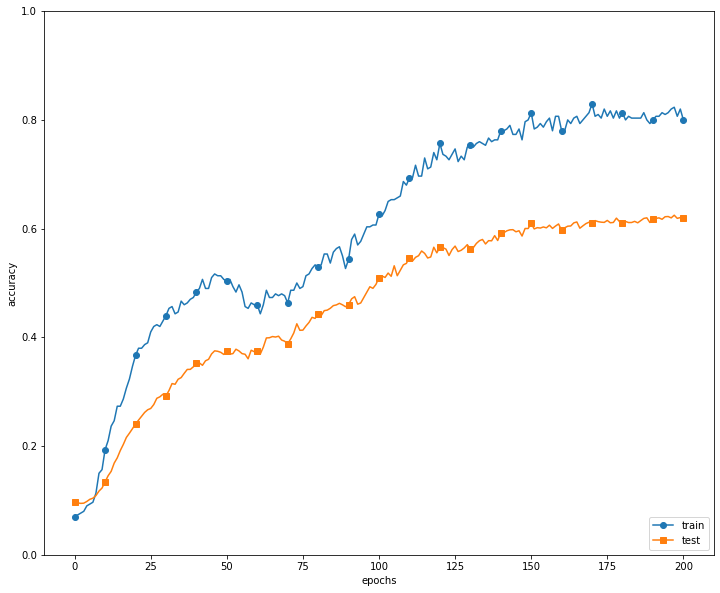

In [19]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

先ほどに比べて訓練データとテストデータの認識制度の幅が小さくなっており、また、訓練データの認識制度も100%には到達していません。

### Dropout

次に紹介する手法はWeight decayでは対応できない複雑なニューラルネットワークにも対応できる、**Dropout**という手法です。これはニューロンをランダムに消去することで信号の伝達を少なくするという仕組みです。

train loss:2.2882150105241315
=== epoch:1, train acc:0.07, test acc:0.0828 ===
train loss:2.303409447553414
train loss:2.308485445951991
train loss:2.290910383471505
=== epoch:2, train acc:0.06666666666666667, test acc:0.0836 ===
train loss:2.2994715934313983
train loss:2.2990591343198874
train loss:2.2817348297588973
=== epoch:3, train acc:0.06333333333333334, test acc:0.0844 ===
train loss:2.29459695881961
train loss:2.2893301532709174
train loss:2.299721608025994
=== epoch:4, train acc:0.06, test acc:0.0848 ===
train loss:2.2902074669236496
train loss:2.2916506473714136
train loss:2.286172166372971
=== epoch:5, train acc:0.07, test acc:0.0856 ===
train loss:2.2814227634818787
train loss:2.2902528330330574
train loss:2.302522566038165
=== epoch:6, train acc:0.07333333333333333, test acc:0.0859 ===
train loss:2.272364638552653
train loss:2.2726564236379136
train loss:2.28693943313931
=== epoch:7, train acc:0.07666666666666666, test acc:0.086 ===
train loss:2.296163014866252
train loss

=== epoch:56, train acc:0.22, test acc:0.1722 ===
train loss:2.245234370138689
train loss:2.2272714379180076
train loss:2.2363480578741917
=== epoch:57, train acc:0.22, test acc:0.1672 ===
train loss:2.238016610581638
train loss:2.212307942807017
train loss:2.2228942090284995
=== epoch:58, train acc:0.22333333333333333, test acc:0.1645 ===
train loss:2.2423957142942395
train loss:2.2666122868094534
train loss:2.2420332487556482
=== epoch:59, train acc:0.23, test acc:0.1689 ===
train loss:2.234168831749683
train loss:2.2510159954142708
train loss:2.2380450837584664
=== epoch:60, train acc:0.23333333333333334, test acc:0.1718 ===
train loss:2.2250335344616023
train loss:2.238167706958296
train loss:2.2498135516648703
=== epoch:61, train acc:0.23333333333333334, test acc:0.1731 ===
train loss:2.2406253901691637
train loss:2.2479188405932864
train loss:2.2528659863020173
=== epoch:62, train acc:0.23666666666666666, test acc:0.1782 ===
train loss:2.216492650328355
train loss:2.2235387648252

=== epoch:112, train acc:0.30666666666666664, test acc:0.2368 ===
train loss:2.0699523818035352
train loss:2.1373733735885883
train loss:2.069084225885087
=== epoch:113, train acc:0.30666666666666664, test acc:0.2372 ===
train loss:2.173592429162223
train loss:2.1106858973286755
train loss:2.112911661443463
=== epoch:114, train acc:0.30333333333333334, test acc:0.2343 ===
train loss:2.121493507018853
train loss:2.1221376502327987
train loss:2.0830285654420706
=== epoch:115, train acc:0.30666666666666664, test acc:0.2371 ===
train loss:2.108274623533246
train loss:2.0948348457602517
train loss:2.0727006193889523
=== epoch:116, train acc:0.30666666666666664, test acc:0.2382 ===
train loss:2.0740303451439868
train loss:2.104720822610397
train loss:2.007283696252101
=== epoch:117, train acc:0.31, test acc:0.238 ===
train loss:2.106920902855925
train loss:2.125487503410322
train loss:2.062973607290168
=== epoch:118, train acc:0.31, test acc:0.24 ===
train loss:2.0949713807353594
train loss:

=== epoch:168, train acc:0.35333333333333333, test acc:0.304 ===
train loss:1.8982662976043019
train loss:1.8973302604605826
train loss:1.8524086243434073
=== epoch:169, train acc:0.36, test acc:0.3046 ===
train loss:1.8554092931402053
train loss:2.0106819680612587
train loss:1.9321290523919463
=== epoch:170, train acc:0.3566666666666667, test acc:0.3062 ===
train loss:1.9748089871306345
train loss:1.9350299956649033
train loss:1.9191702025151296
=== epoch:171, train acc:0.3566666666666667, test acc:0.3101 ===
train loss:1.960240149710916
train loss:1.9463396835418925
train loss:1.987752335102399
=== epoch:172, train acc:0.3566666666666667, test acc:0.3102 ===
train loss:1.9490999217440463
train loss:1.8158327227577118
train loss:1.9561766296030478
=== epoch:173, train acc:0.36, test acc:0.3122 ===
train loss:1.9369458807622815
train loss:1.8341191853395773
train loss:1.8454528086705766
=== epoch:174, train acc:0.36, test acc:0.3131 ===
train loss:1.9148899707408156
train loss:1.836450

=== epoch:224, train acc:0.38666666666666666, test acc:0.3439 ===
train loss:1.6256850853575728
train loss:1.737471447338037
train loss:1.6613516572455744
=== epoch:225, train acc:0.38666666666666666, test acc:0.3439 ===
train loss:1.6729070288382
train loss:1.7456078260626515
train loss:1.6381639578159712
=== epoch:226, train acc:0.4, test acc:0.3486 ===
train loss:1.6606413804260993
train loss:1.6220178190456453
train loss:1.5491655034644307
=== epoch:227, train acc:0.4066666666666667, test acc:0.3464 ===
train loss:1.6592637560136927
train loss:1.7080612781119615
train loss:1.5961654862416947
=== epoch:228, train acc:0.41, test acc:0.3496 ===
train loss:1.526019179500418
train loss:1.7227481208503361
train loss:1.64821565607757
=== epoch:229, train acc:0.4, test acc:0.3507 ===
train loss:1.699441696764747
train loss:1.63761239410592
train loss:1.6179960866777836
=== epoch:230, train acc:0.4, test acc:0.3518 ===
train loss:1.6277370862508136
train loss:1.7170525960845242
train loss:1

=== epoch:279, train acc:0.4866666666666667, test acc:0.4055 ===
train loss:1.4827912434997816
train loss:1.3043802264535556
train loss:1.441476320910829
=== epoch:280, train acc:0.49, test acc:0.406 ===
train loss:1.272706049958764
train loss:1.3088245515559165
train loss:1.3215595658561785
=== epoch:281, train acc:0.49333333333333335, test acc:0.4023 ===
train loss:1.4961345635531023
train loss:1.3661343359839688
train loss:1.440026667172004
=== epoch:282, train acc:0.49, test acc:0.4029 ===
train loss:1.363620432859348
train loss:1.427337234802798
train loss:1.2266346144182547
=== epoch:283, train acc:0.49, test acc:0.4005 ===
train loss:1.3306970023742102
train loss:1.3030756046653704
train loss:1.4793938075314095
=== epoch:284, train acc:0.49, test acc:0.4048 ===
train loss:1.4541061882536779
train loss:1.5139592622859144
train loss:1.5578851355581953
=== epoch:285, train acc:0.5, test acc:0.408 ===
train loss:1.4383502998733666
train loss:1.3808380171904995
train loss:1.386674180

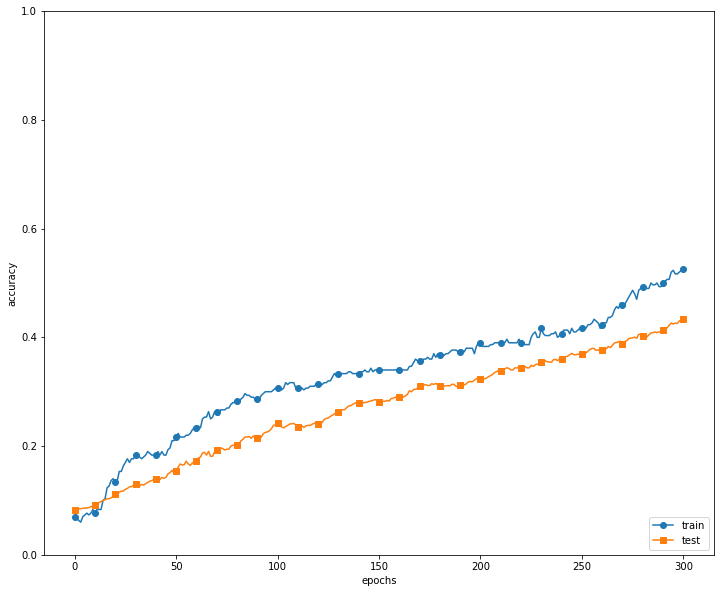

In [20]:
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

このように、Dropoutを用いても過学習を抑制することができます。

## ハイパーパラメータの最適化

今までBatch Normのようにハイパーパラメータを算出してきましたが、今章のまとめとして、どのようなハイパーパラメータでも最適化できるアルゴリズムを組んでいきます。

その最適化のアルゴリズムは勾配降下法と非常によく似ています。
1. 設定したハイパーパラメータの範囲(ざっくりと$ 10^{-3} $から$ 10^3 $のように)から、ランダムにサンプリングする
1. サンプリングされたハイパーパラメータの値を用いて学習を行い、検証データで認識精度を評価する(エポックは小さく設定)
1. 以上の工程を百回程度繰り返しその結果からハイパーパラメータの範囲を狭める

説明の過程で出てきた**検証データ**とは、訓練データやテストデータとは異なるデータです。そのため検証データが存在しないデータ(MNISTデータセットなど)は訓練データから分離して作成する必要があります。

val acc:0.15 | lr:0.0008050687737604978, weight decay:4.2808395687418603e-07
val acc:0.17 | lr:0.0003235945226910735, weight decay:2.06125848141608e-06
val acc:0.37 | lr:0.0022467231657817923, weight decay:4.851298437527277e-07
val acc:0.08 | lr:3.640795260105468e-05, weight decay:8.291390825249189e-06
val acc:0.19 | lr:0.0007576553917606372, weight decay:4.073752402102326e-06
val acc:0.31 | lr:0.0025058027973244006, weight decay:3.4938436755035726e-05
val acc:0.13 | lr:2.3273819358868543e-05, weight decay:1.2478511449620256e-08
val acc:0.1 | lr:0.00024259984695795185, weight decay:6.8770976556970525e-06
val acc:0.51 | lr:0.004773613812771231, weight decay:5.5230895478788844e-08
val acc:0.11 | lr:1.895703711603757e-05, weight decay:4.064579262007322e-07
val acc:0.09 | lr:0.00012734892832425693, weight decay:7.31538075129562e-07
val acc:0.06 | lr:0.0003549046634668536, weight decay:4.304234928515155e-08
val acc:0.15 | lr:0.0012201715407893997, weight decay:1.9761332908741914e-05
val acc

Best-8(val acc:0.62) | lr:0.0053322776169120525, weight decay:2.7449594630991242e-08
Best-9(val acc:0.59) | lr:0.0036979125142306223, weight decay:2.216222330470621e-06
Best-10(val acc:0.57) | lr:0.003190315266137165, weight decay:1.5728346716868117e-06
Best-11(val acc:0.56) | lr:0.004175001332752599, weight decay:6.733418077893657e-05
Best-12(val acc:0.54) | lr:0.004040426504696822, weight decay:6.068108619206557e-06
Best-13(val acc:0.51) | lr:0.004773613812771231, weight decay:5.5230895478788844e-08
Best-14(val acc:0.47) | lr:0.004028122818525041, weight decay:5.609017991342247e-07
Best-15(val acc:0.46) | lr:0.003312831643568768, weight decay:1.6975594696303602e-08
Best-16(val acc:0.4) | lr:0.0019316708329623488, weight decay:5.435234628495054e-06
Best-17(val acc:0.37) | lr:0.0022467231657817923, weight decay:4.851298437527277e-07
Best-18(val acc:0.37) | lr:0.0024890501103792748, weight decay:5.16060374773728e-07
Best-19(val acc:0.31) | lr:0.0025058027973244006, weight decay:3.493843

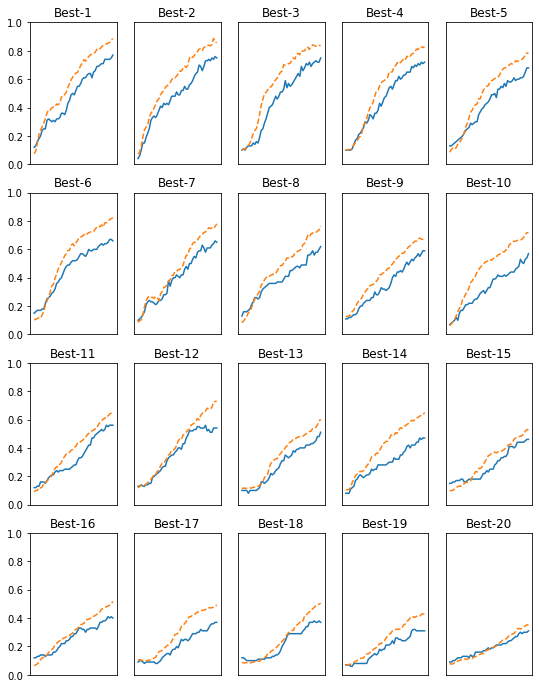

In [21]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0
plt.rcParams['figure.figsize'] = (9,12)

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

どうにか実装できました。これで今章はおしまいです。